In [1]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
def read_statistics_data(experiments_path, runs):
    paths = [f"{experiments_path}/run_{run}/statistics" for run in runs]
    files = []
    for path in paths:
        files += list(map(lambda f: f"{path}/{f}", os.listdir(path)))
    dataframes = []
    for f in files:
        df = pd.read_csv(f, delimiter='\t')
        generation = int(f.split(os.sep)[-1].replace('generation_','').replace('.csv',''))
        df['generation'] = int(f.split(os.sep)[-1].replace('generation_','').replace('.csv',''))
        dataframes.append(df)
    return pd.concat(dataframes).reset_index(drop=True)
    

# Experimentation

blue line -> average at generation level

orange line -> only the best individual of each generation

## Barlow Twins

Detalhes:
- Fitness: accuracy
- geracoes: 10, embora por algum motivo nao tenha a informacao da ultima
- lambda: 5
- mutacoes: ver config

In [29]:
experiments_path = "experiments_bt"
runs = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [30]:
stats_df = read_statistics_data(experiments_path, runs)
best_individual_stats_df = stats_df.loc[stats_df.groupby("generation")["fitness"].idxmax()]

In [32]:
best_individual_stats_df

,id,phenotype,fitness,num_epochs,training_time_spent,training_time,is_valid_solution,fitness.1,n_trainable_parameters,n_layers,training_time_spent.1,validation_losses,n_epochs,generation
3782,0,layer:conv out_channels:38 kernel_size:2 strid...,0.181122,14,63.623055,60,True,0.181122,99982496,6,63.623055,[],14,0
2915,1,layer:pool_max kernel_size:4 stride:1 padding:...,0.240832,15,62.900356,60,True,0.240832,67208868,6,62.900356,[],15,1
2877,4,layer:conv out_channels:56 kernel_size:4 strid...,0.180283,15,63.894855,60,True,0.180283,67213394,6,63.894855,[],15,2
1721,3,layer:pool_max kernel_size:3 stride:1 padding:...,0.280153,16,64.428438,60,True,0.280153,67217418,5,64.428438,[],16,3
1808,1,layer:pool_max kernel_size:3 stride:1 padding:...,0.282760,48,64.463930,120,True,0.282760,67217418,5,64.463930,[],32,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1640,0,layer:batch_norm input:-1 layer:pool_avg kerne...,0.211538,54,243.054941,240,True,0.211538,89921040,10,243.054941,[],54,81
1687,5,layer:batch_norm input:-1 layer:pool_avg kerne...,0.249833,14,64.232874,60,True,0.249833,89927261,12,64.232874,[],14,82
1677,1,layer:batch_norm input:-1 layer:pool_avg kerne...,0.148829,14,63.580727,60,True,0.148829,69093437,11,63.580727,[],14,83
1605,1,layer:pool_max kernel_size:5 stride:1 padding:...,0.163545,14,64.249157,60,True,0.163545,69733748,14,64.249157,[],14,84


[Text(0, 0, '0'),
 Text(1, 0, '1'),
 Text(2, 0, '2'),
 Text(3, 0, '3'),
 Text(4, 0, '4'),
 Text(5, 0, '5'),
 Text(6, 0, '6'),
 Text(7, 0, '7'),
 Text(8, 0, '8'),
 Text(9, 0, '9'),
 Text(10, 0, '10'),
 Text(11, 0, '11'),
 Text(12, 0, '12'),
 Text(13, 0, '13'),
 Text(14, 0, '14'),
 Text(15, 0, '15'),
 Text(16, 0, '16'),
 Text(17, 0, '17'),
 Text(18, 0, '18'),
 Text(19, 0, '19'),
 Text(20, 0, '20'),
 Text(21, 0, '21'),
 Text(22, 0, '22'),
 Text(23, 0, '23'),
 Text(24, 0, '24'),
 Text(25, 0, '25'),
 Text(26, 0, '26'),
 Text(27, 0, '27'),
 Text(28, 0, '28'),
 Text(29, 0, '29'),
 Text(30, 0, '30'),
 Text(31, 0, '31'),
 Text(32, 0, '32'),
 Text(33, 0, '33'),
 Text(34, 0, '34'),
 Text(35, 0, '35'),
 Text(36, 0, '36'),
 Text(37, 0, '37'),
 Text(38, 0, '38'),
 Text(39, 0, '39'),
 Text(40, 0, '40'),
 Text(41, 0, '41'),
 Text(42, 0, '42'),
 Text(43, 0, '43'),
 Text(44, 0, '44'),
 Text(45, 0, '45'),
 Text(46, 0, '46'),
 Text(47, 0, '47'),
 Text(48, 0, '48'),
 Text(49, 0, '49'),
 Text(50, 0, '50'),


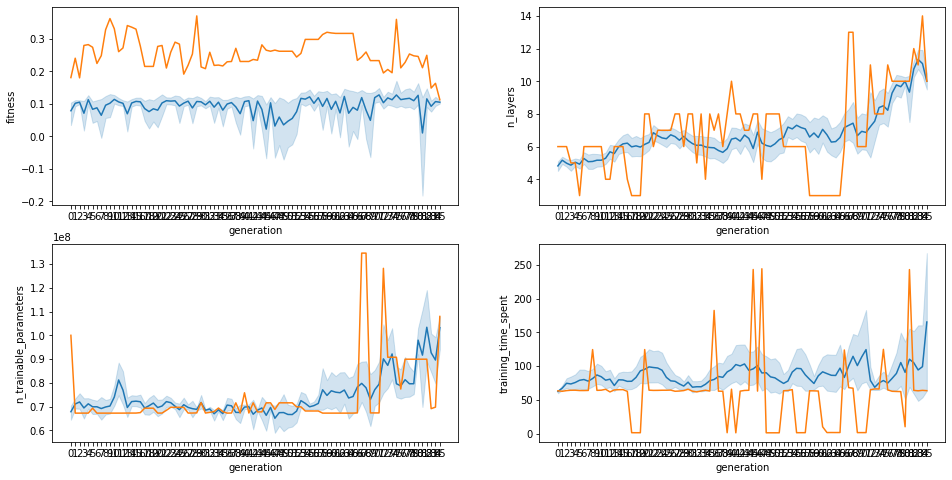

In [33]:
fig, axs = plt.subplots(2, 2, figsize=(16, 8))

xticks = sorted(stats_df['generation'].unique())

sns.lineplot(x='generation', y='fitness', data=stats_df, ax=axs[0][0])
axs[0][0].set_xticks(xticks)
axs[0][0].set_xticklabels(xticks)
sns.lineplot(x='generation', y='fitness', data=best_individual_stats_df, ax=axs[0][0])
axs[0][0].set_xticks(xticks)
axs[0][0].set_xticklabels(xticks)

sns.lineplot(x='generation', y='n_layers', data=stats_df, ax=axs[0][1])
axs[0][1].set_xticks(xticks)
axs[0][1].set_xticklabels(xticks)
sns.lineplot(x='generation', y='n_layers', data=best_individual_stats_df, ax=axs[0][1])
axs[0][1].set_xticks(xticks)
axs[0][1].set_xticklabels(xticks)

sns.lineplot(x='generation', y='n_trainable_parameters', data=stats_df, ax=axs[1][0])
axs[1][0].set_xticks(xticks)
axs[1][0].set_xticklabels(xticks)
sns.lineplot(x='generation', y='n_trainable_parameters', data=best_individual_stats_df, ax=axs[1][0])
axs[1][0].set_xticks(xticks)
axs[1][0].set_xticklabels(xticks)


sns.lineplot(x='generation', y='training_time_spent', data=stats_df, ax=axs[1][1])
axs[1][1].set_xticks(xticks)
axs[1][1].set_xticklabels(xticks)
sns.lineplot(x='generation', y='training_time_spent', data=best_individual_stats_df, ax=axs[1][1])
axs[1][1].set_xticks(xticks)
axs[1][1].set_xticklabels(xticks)

## Normal fast denser

In [14]:
experiments_path = "experiments"
runs = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [17]:
stats_df = read_statistics_data(experiments_path, runs)
best_individual_stats_df = stats_df.loc[stats_df.groupby("generation")["fitness"].idxmax()]

[Text(0, 0, '0'),
 Text(1, 0, '1'),
 Text(2, 0, '2'),
 Text(3, 0, '3'),
 Text(4, 0, '4'),
 Text(5, 0, '5'),
 Text(6, 0, '6'),
 Text(7, 0, '7'),
 Text(8, 0, '8'),
 Text(9, 0, '9')]

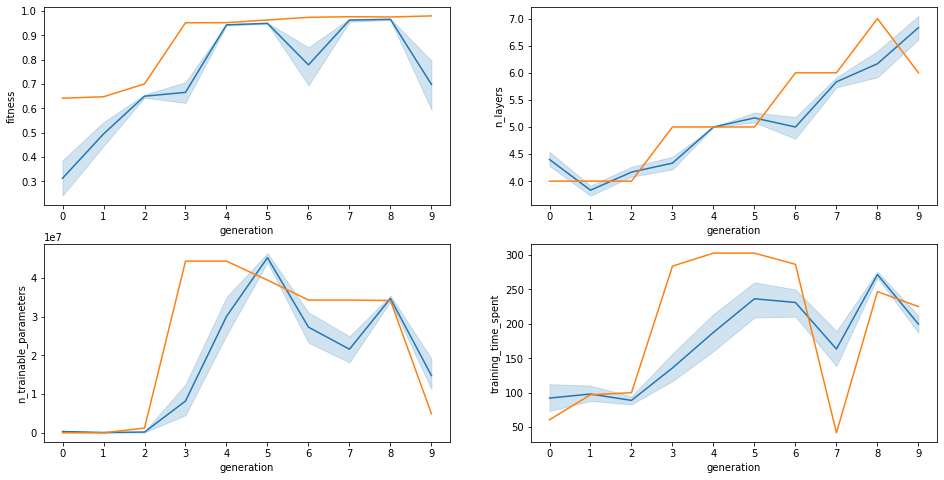

In [18]:
fig, axs = plt.subplots(2, 2, figsize=(16, 8))

xticks = sorted(stats_df['generation'].unique())

sns.lineplot(x='generation', y='fitness', data=stats_df, ax=axs[0][0])
axs[0][0].set_xticks(xticks)
axs[0][0].set_xticklabels(xticks)
sns.lineplot(x='generation', y='fitness', data=best_individual_stats_df, ax=axs[0][0])
axs[0][0].set_xticks(xticks)
axs[0][0].set_xticklabels(xticks)

sns.lineplot(x='generation', y='n_layers', data=stats_df, ax=axs[0][1])
axs[0][1].set_xticks(xticks)
axs[0][1].set_xticklabels(xticks)
sns.lineplot(x='generation', y='n_layers', data=best_individual_stats_df, ax=axs[0][1])
axs[0][1].set_xticks(xticks)
axs[0][1].set_xticklabels(xticks)

sns.lineplot(x='generation', y='n_trainable_parameters', data=stats_df, ax=axs[1][0])
axs[1][0].set_xticks(xticks)
axs[1][0].set_xticklabels(xticks)
sns.lineplot(x='generation', y='n_trainable_parameters', data=best_individual_stats_df, ax=axs[1][0])
axs[1][0].set_xticks(xticks)
axs[1][0].set_xticklabels(xticks)


sns.lineplot(x='generation', y='training_time_spent', data=stats_df, ax=axs[1][1])
axs[1][1].set_xticks(xticks)
axs[1][1].set_xticklabels(xticks)
sns.lineplot(x='generation', y='training_time_spent', data=best_individual_stats_df, ax=axs[1][1])
axs[1][1].set_xticks(xticks)
axs[1][1].set_xticklabels(xticks)